In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scanpy as sc
from scipy.stats import spearmanr, pearsonr

from scanpy.plotting._utils import _set_colors_for_categorical_obs
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.verbosity = 3  
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white', )
    #frameon=False,
    #dpi_save=1000, format='pdf', transparent=True)#, figsize=(2,2))
#sns.set_context('paper', font_scale=0.8)


scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.5.4 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [5]:
celltype = 'Monocyte'
master_dir = '../'

In [6]:
sc.settings.figdir =  master_dir + 'output/' + celltype+'_new'

In [7]:
# Read in counts matrix
adata = sc.read_h5ad(master_dir + 'data/PBMC/fo8_thru_in8_GEX_for_MONOCYTES.h5ad')

In [8]:
# Read old adata_metab analysis
results_file_metab_genes = master_dir + 'output/' + celltype + '-processed-analyzed-metab.h5ad'
adata_metab = sc.read(results_file_metab_genes)

In [9]:
sc.tl.umap(adata_metab, min_dist=0.1)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:02:13)


In [10]:
_set_colors_for_categorical_obs(adata_metab, 'louvain', 'Set3')

... storing 'severity' as categorical


computing density on 'umap'
--> added
    'umap_density_severity', densities (adata.obs)
    'umap_density_severity_params', parameter (adata.uns)


/home/jwlee/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:1156: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/home/jwlee/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:1157: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/home/jwlee/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecat

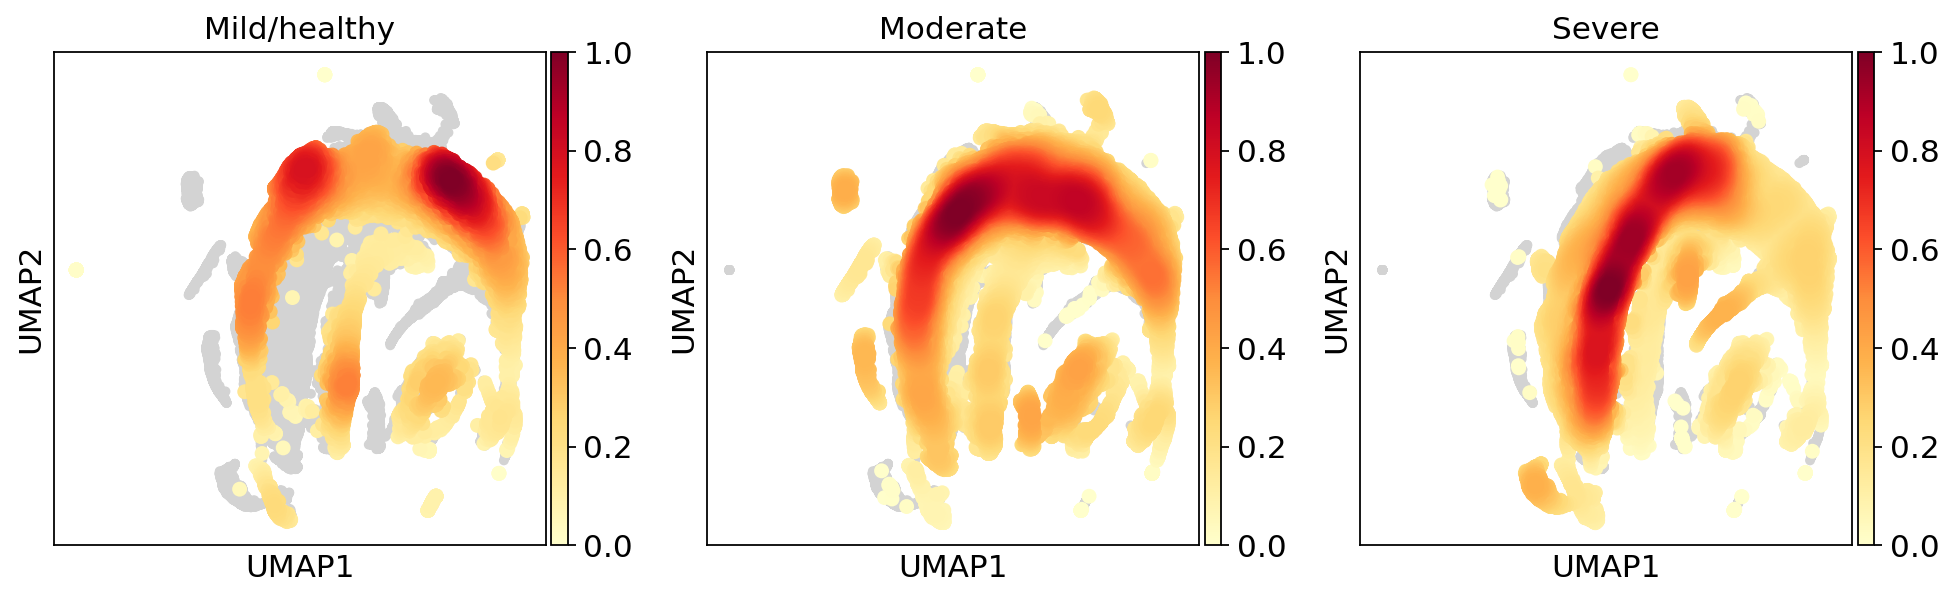

In [11]:
# New in revision
adata.obs['severity'] = ['Severe' if x > 4 else 'Moderate' if x > 2 else 'Mild/healthy' 
                         for x in adata.obs['WHO_scale']]
adata_metab.obs['severity'] = adata.obs['severity']
sc.tl.embedding_density(adata_metab, basis='umap', groupby='severity')
sc.pl.embedding_density(adata_metab, basis='umap', key='umap_density_severity', 
                        group=['Mild/healthy', 'Moderate', 'Severe'])

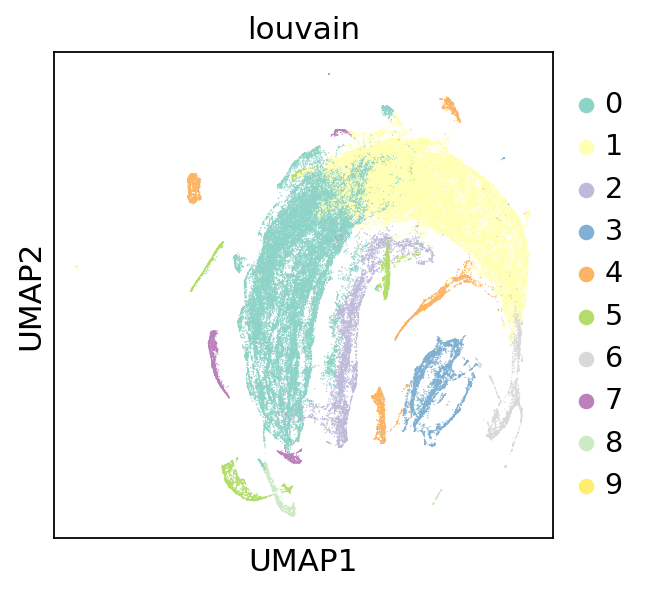

In [20]:
sc.pl.umap(adata_metab, color='louvain')

In [28]:
results_file_metab_genes_new = master_dir + 'output/' + celltype + '-processed-analyzed-metab-new.h5ad'
adata_metab.write(results_file_metab_genes_new)

In [87]:
# Read new adata_metab analysis
results_file_metab_genes_new = master_dir + 'output/' + celltype + '-processed-analyzed-metab-new.h5ad'
adata_metab = sc.read(results_file_metab_genes_new)

In [10]:
adata_metab

AnnData object with n_obs × n_vars = 95361 × 1387
    obs: 'patient', 'ICU_status', 'IL6i_between_draws', 'no_IL6i', 'WHO_scale', 'Blood_draw_time', 'Sex', 'Age_at_baseline', 'Days_since_onset_of_symptoms', 'leiden', 'leiden_all', 'louvain', 'Days_since_onset_float', 'umap_density_ICU_status'
    uns: 'ICU_status_colors', 'leiden_all_colors', 'leiden_colors', 'louvain', 'louvain_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'umap', 'umap_density_ICU_status_params'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

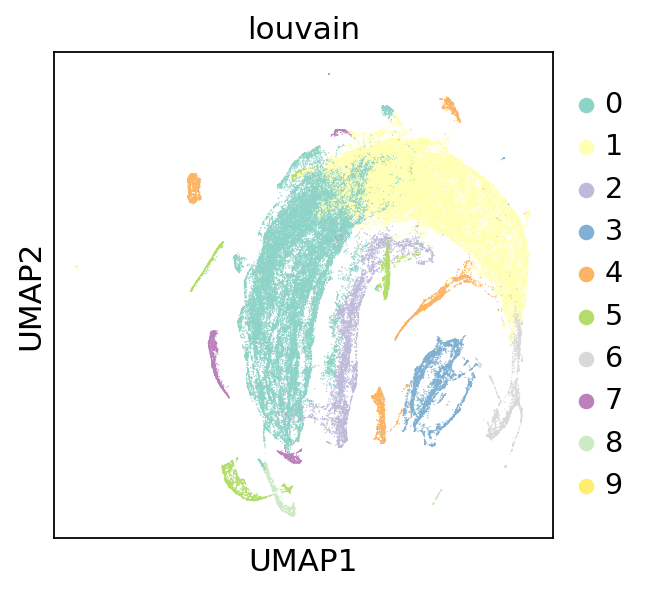

In [21]:
#rcParams['figure.figsize'] = (1.5,1.5)
x='louvain'
sc.pl.umap(adata_metab, color=x)#, save=f"_{x}")

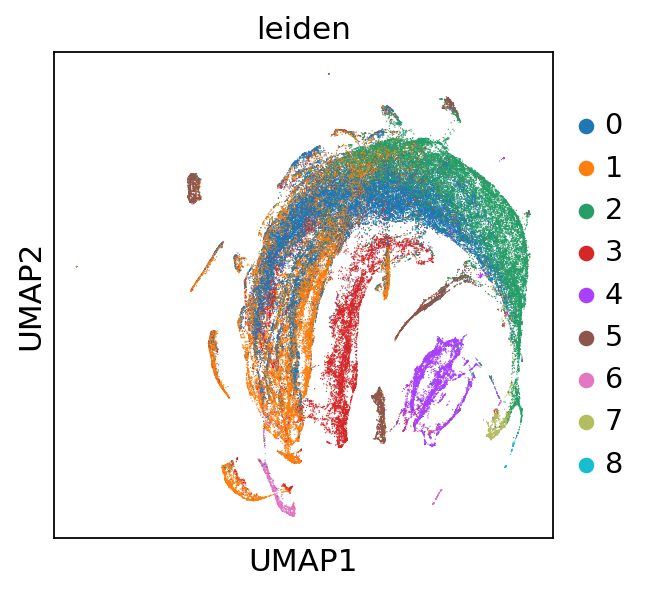

In [22]:
#rcParams['figure.figsize'] = (1.5,1.5)
x='leiden'
sc.pl.umap(adata_metab, color=x)#, save=f"_{x}")

In [23]:
# Read in counts matrix
assert (adata.obs_names == adata_metab.obs_names).all()
adata.obsm['X_umap'] = adata_metab.obsm['X_umap']
adata.obs['leiden'] = adata_metab.obs['leiden']
adata.obs['louvain'] = adata_metab.obs['louvain']
adata.uns['louvain_colors'] = adata_metab.uns['louvain_colors']

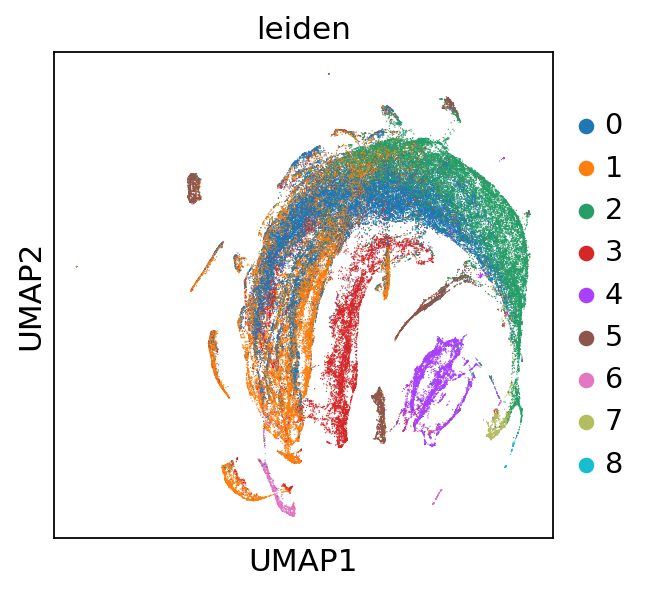

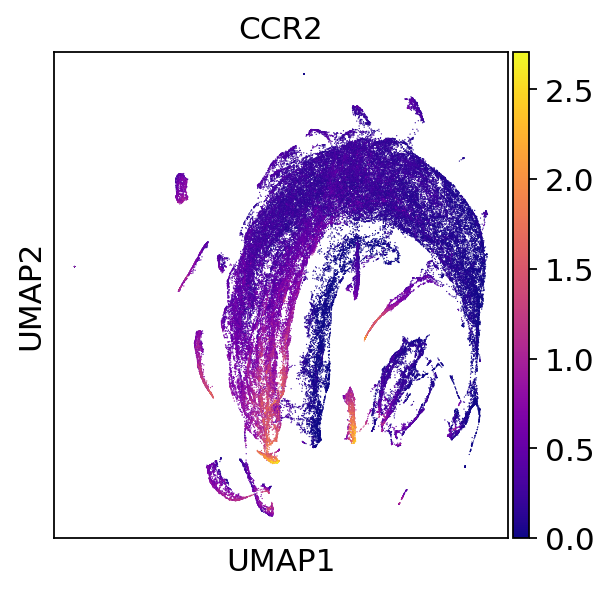

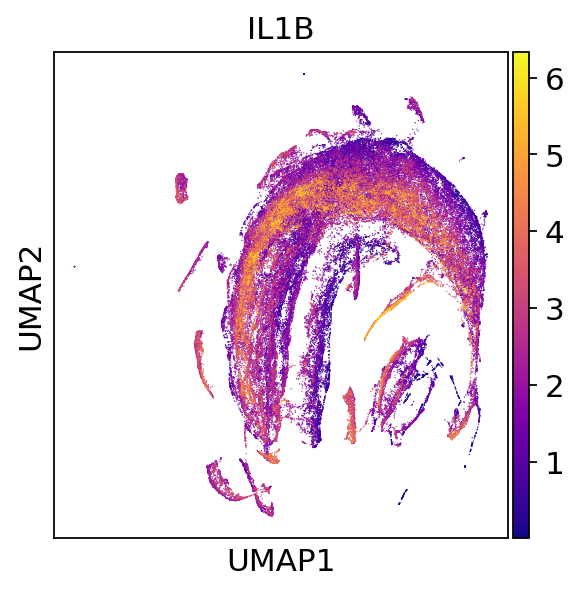

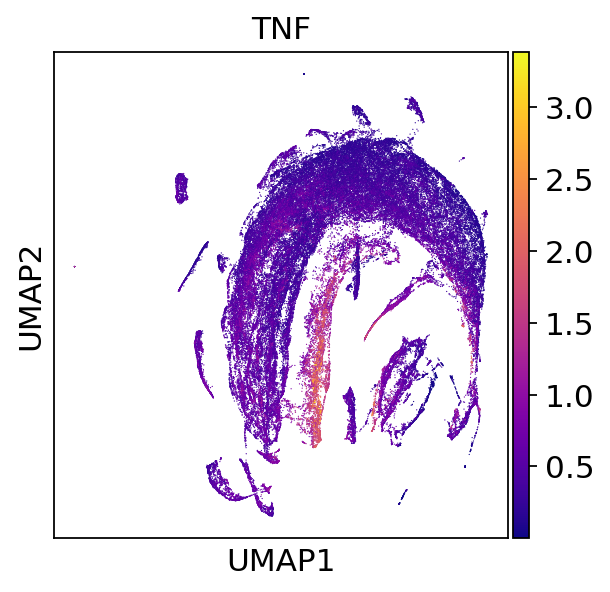

In [30]:
# Phenotypic
#rcParams['figure.figsize'] = (1,1)
genes = ['leiden', 'CCR2', 'IL1B', 'TNF']
for g in genes:
    sc.pl.umap(adata, color=g, cmap='plasma', use_raw=False)#, save=f"_{g}_1x1")

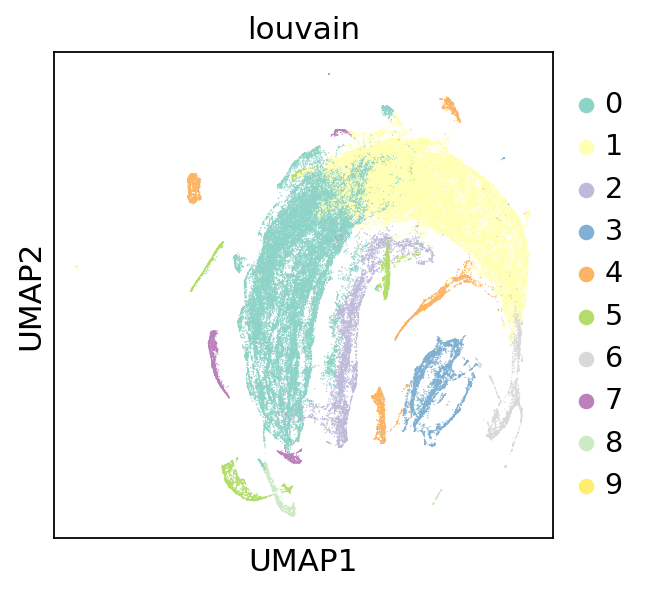

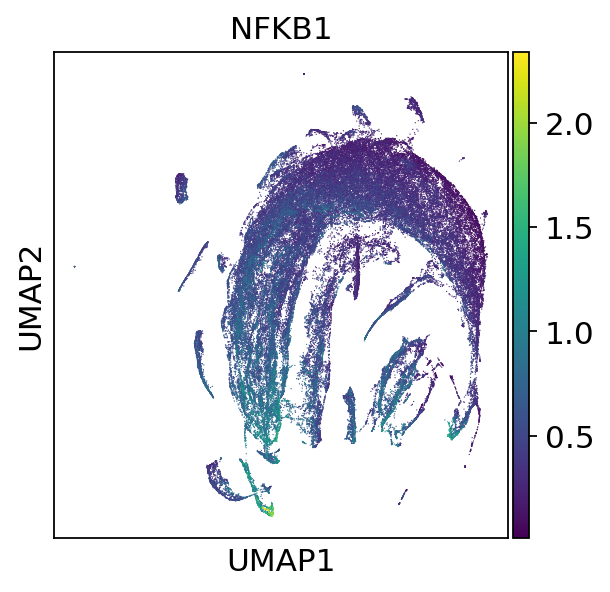

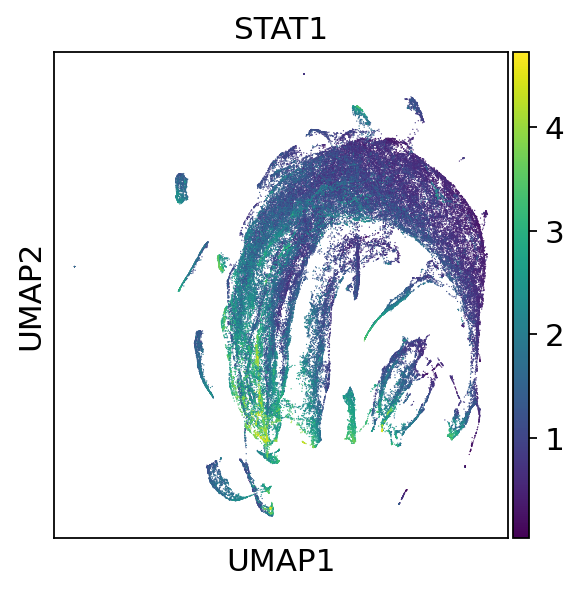

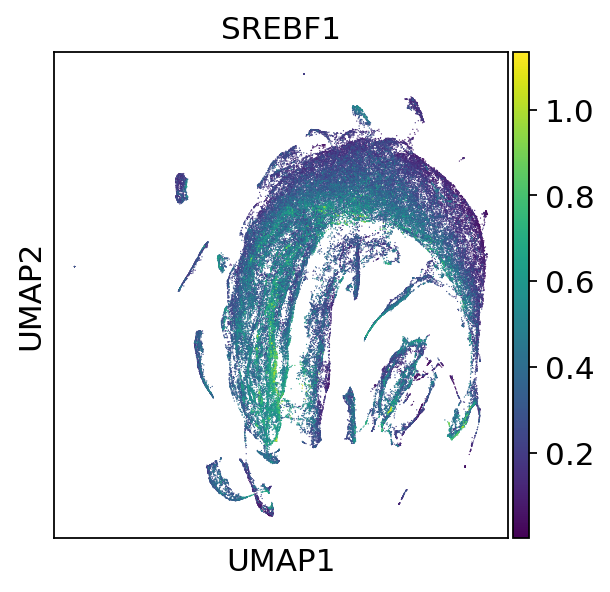

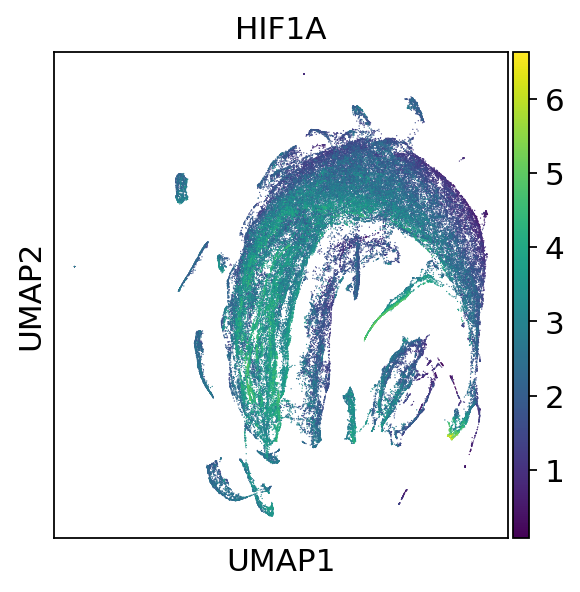

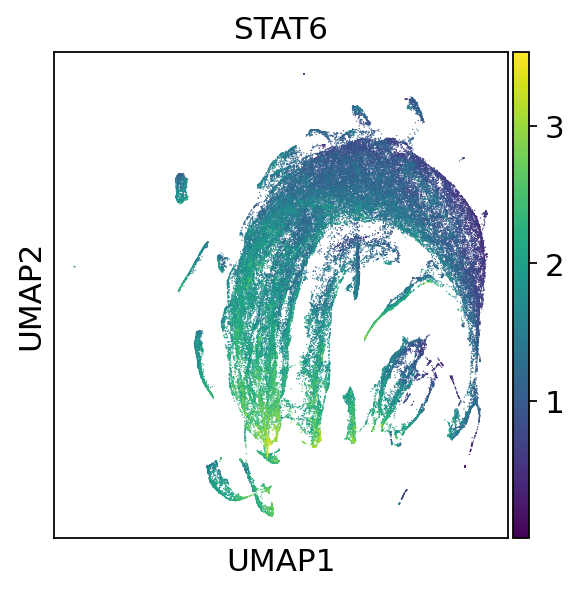

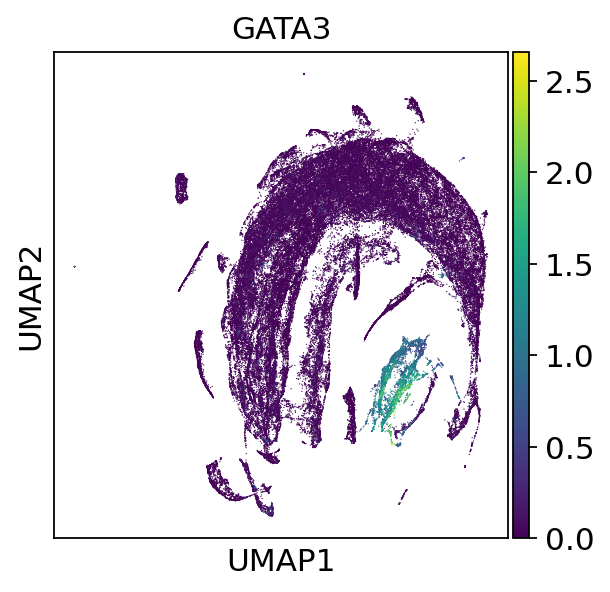

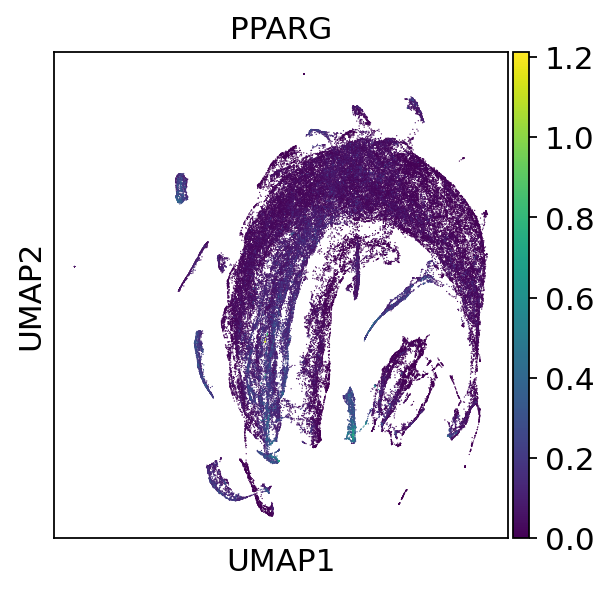

In [25]:
# Metabolic
#rcParams['figure.figsize'] = (1,1)
genes = ['louvain','NFKB1', 'STAT1','SREBF1', 'HIF1A', 'STAT6', 'GATA3', 'PPARG']
for g in genes:
    sc.pl.umap(adata, color=g, use_raw=False)#,  save=f"_{g}_1x1")

In [26]:
sc.tl.embedding_density(adata, basis='umap', groupby='ICU_status')


computing density on 'umap'
--> added
    'umap_density_ICU_status', densities (adata.obs)
    'umap_density_ICU_status_params', parameter (adata.uns)


/home/jwlee/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:1156: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/home/jwlee/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:1157: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/home/jwlee/.local/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecat

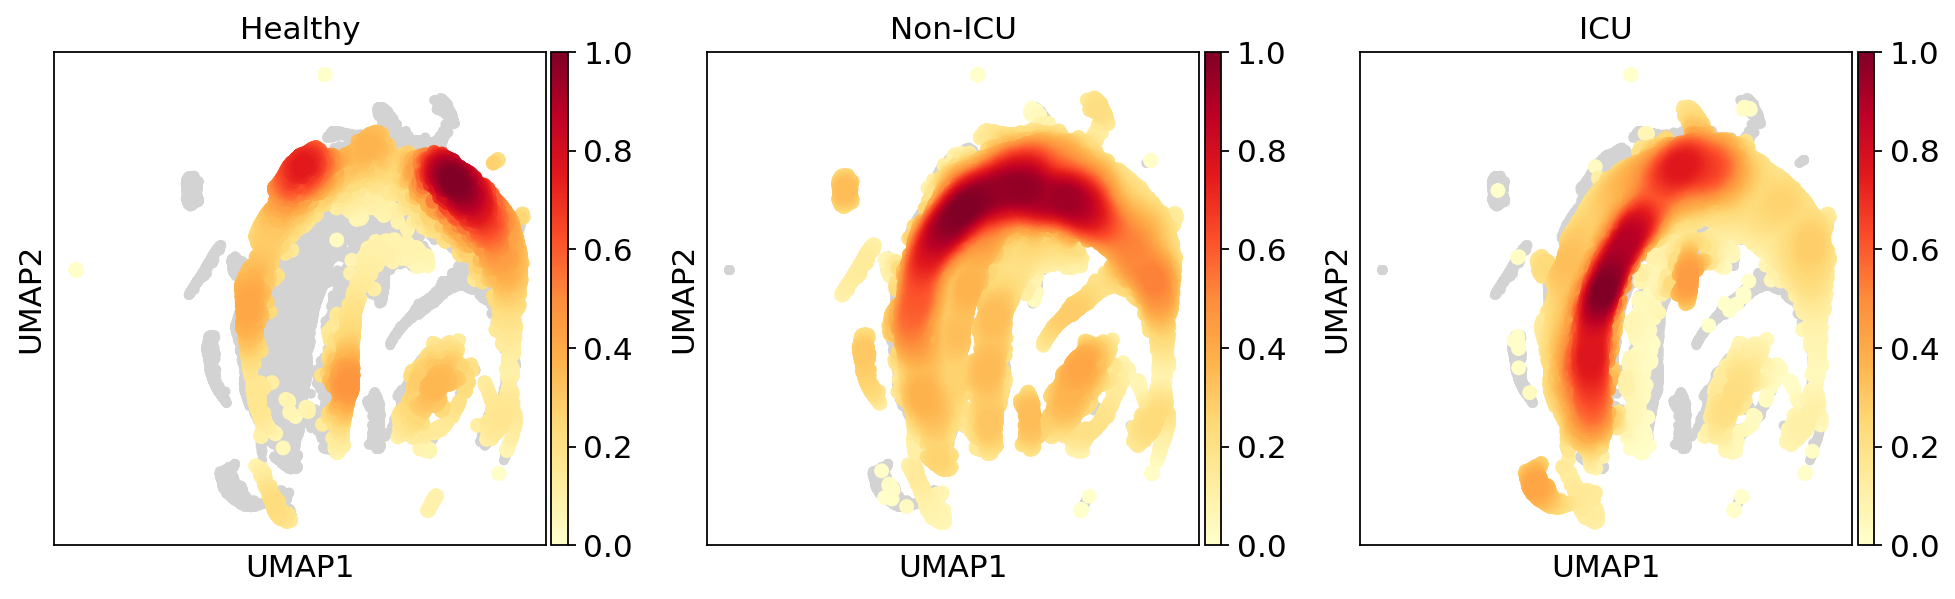

In [27]:
sc.pl.embedding_density(adata, basis='umap', key='umap_density_ICU_status', 
    group=['Healthy', 'Non-ICU', 'ICU'], save="_ICU_status_density", )
    #bg_dotsize=10, fg_dotsize=30)